In [51]:
#საჭირო ლაიბრერიების დამატება
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
#დატასეტის წაკითხვა
df = pd.read_csv("/Users/giorgijalabadze/Desktop/Python Analytics/Earthquakes_database.csv")

In [53]:
#შევამოწმე მუშაობს თუ არა
print(df)

             Date      Time  Latitude  Longitude        Type   Depth  \
0        1/2/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1        1/4/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2        1/5/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3        1/8/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4        1/9/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016   8:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016   9:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0     

In [54]:
#წავშალე ისეთი დატა რომელსაც ცარიელი მნიშვნელობები ქონდა
df_cleaned = df.dropna(axis=1)

In [55]:
#მაგნიტუდის კადეკორიები შევქმენი სადაცც ცალკე გავიტანე დაბალი საშუალო და მაღალი მაგნიტუდა
bins = [0, 5, 7, float('inf')]
labels = ['Low Magnitude', 'Medium Magnitude', 'High Magnitude']
df['Magnitude Category'] = pd.cut(df['Magnitude'], bins=bins, labels=labels)

In [57]:
#სტაკ და მელთ ფუნქციები გამოვიყენე დატის რეშეიფისთვის
df_stacked = df.stack()
df_melted = pd.melt(df, id_vars=['Time', 'Location Source'], value_vars=['Latitude', 'Longitude'])

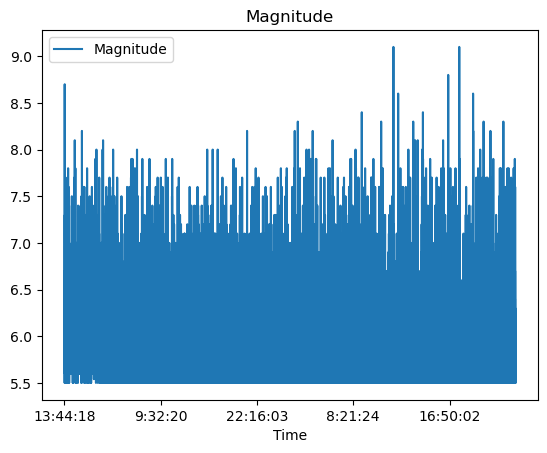

In [58]:
#ლაინ ჩარტი გავაკეთე დროის მიხედვით მაგნიტუდების დასანახად
df.plot(x='Time', y='Magnitude', kind='line', title='Magnitude')
plt.show()

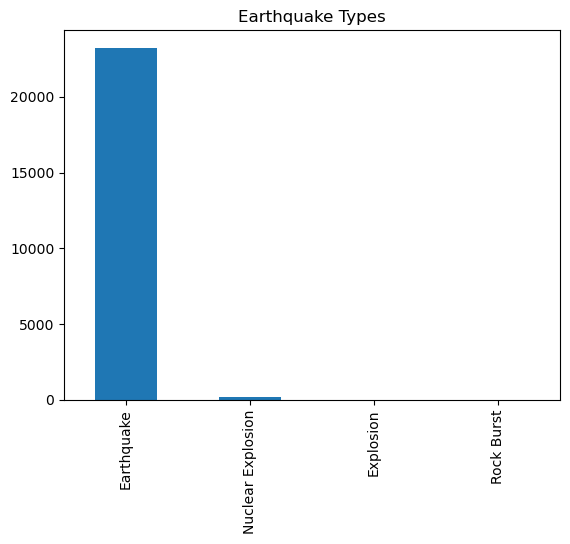

In [27]:
#ბარ ჩარტით გავაცალკევე კატასტროფის ტიპები
df['Type'].value_counts().plot(kind='bar', title='Types')
plt.show()

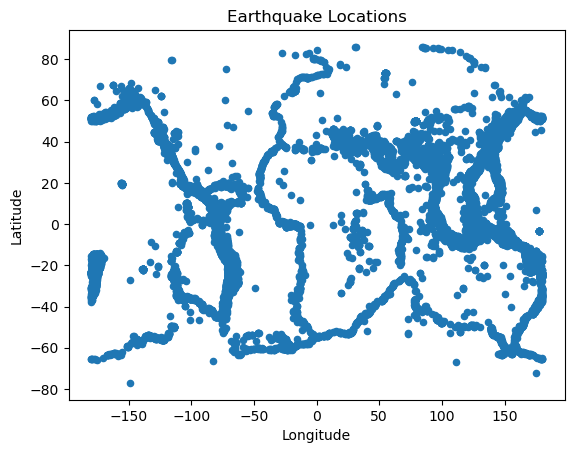

In [28]:
#სკატერის გამოყენებით შევეცადე მიწისძვრის ლოკაციების გამოსახვას მარა მგონი არ გავს :დ არაფერს
df.plot(x='Longitude', y='Latitude', kind='scatter', title='Earthquake Locations')
plt.show()

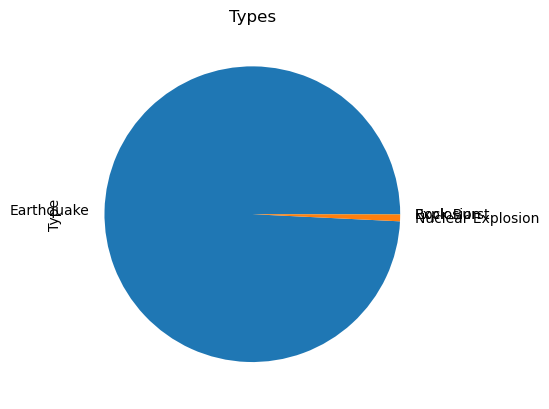

In [60]:
#აქ ბარ ჩარტის ნაცვლად პაი ჩარტი გამოვიყენე 
df['Type'].value_counts().plot(kind='pie', title='Types')
plt.show()

In [61]:
#დეითი და თაიმის ქოლუმები გადავიაქციე დეითთაიმად
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

#dt აქსესორის მიხედვით გავაცალკევე წლები თვეები და ასე შემდეგ ერთმანეთისგან
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second

#ეს სტაკოვერფლოუზე ვიპოვე და ვიფიქრე გამომადგებოდა დიფერენციას აკეთებს როუებს შორის
df['TimeDifference'] = df['DateTime'].diff()

#დღის მიხედვით საშუალო
df.set_index('DateTime', inplace=True)
df_resampled = df.resample('D').mean(numeric_only=True)

print(df)
print('\nResampled Data:')
print(df_resampled)

ParserError: Unknown string format: 1975-02-23T02:58:41.000Z 1975-02-23T02:58:41.000Z present at position 3378

In [38]:
print(df_cleaned)
print(df['Magnitude Category'])

             Date      Time  Latitude  Longitude        Type   Depth  \
0        1/2/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1        1/4/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2        1/5/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3        1/8/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4        1/9/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016   8:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016   9:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Magnitude            ID  Source Location Source Magnitude Source  \
0            6.0  ISCGEM860706  ISCGEM          ISCGEM      